In [1]:
pip install panda openpyxl

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 24.3 MB/s eta 0:00:00
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7238 sha256=7cdf09954e1f4b61efe05b48655e04a4bc55f3f02a6be2632fdb0c33820d5e6c
  Stored in directory: /home/onyxia/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Chemin du fichier Excel à lire
chemin_fichier_excel = 'traitement/nutriments/total.xlsx'

# Charger le fichier Excel dans un DataFrame pandas en spécifiant à partir de quelle ligne commencer
df = pd.read_excel(chemin_fichier_excel, engine='openpyxl')

# Chemin où vous souhaitez sauvegarder le fichier CSV
chemin_fichier_csv = 'traitement/nutriments/total.csv'

# Sauvegarder le DataFrame au format CSV
df.to_csv(chemin_fichier_csv, index=False)

print(f'Le fichier Excel a été converti en CSV avec succès. Chemin du fichier CSV : {chemin_fichier_csv}')


Le fichier Excel a été converti en CSV avec succès. Chemin du fichier CSV : traitement/nutriments/total.csv


In [ ]:
from selection_cocktail import noms_cocktails_au_hasard

In [4]:
noms_cocktails_au_hasard = ['Piña Colada', "Bulles d'Automne Pomme & Épices", "Sirop d'Orgeat", 'Rhubarbe Spritz']

In [5]:
import pandas as pd

def nutriments_pour_cocktails(liste_cocktails):
    # Charger le fichier CSV
    chemin_csv = 'traitement/nutriments/total.csv'
    df_nutriments = pd.read_csv(chemin_csv)

    # Filtrer les lignes pour les cocktails spécifiés
    cocktails_filtrés = df_nutriments[df_nutriments['post_title'].isin(liste_cocktails)]

    return cocktails_filtrés

# Exemple d'utilisation avec noms_cocktails_au_hasard
noms_cocktails = noms_cocktails_au_hasard
resultat = nutriments_pour_cocktails(noms_cocktails)

# Afficher le résultat
print(resultat)


          objectID                       post_title  \
43   cocktail_5224  Bulles d'Automne Pomme & Épices   
185  cocktail_1377                      Piña Colada   
242   cocktail_967                  Rhubarbe Spritz   
254  cocktail_1352                   Sirop d'Orgeat   

                                                   url  quantity_kcal_total  \
43   https://1ou2cocktails.com/cocktails/bulles-dau...                77.37   
185   https://1ou2cocktails.com/cocktails/pina-colada/               197.64   
242  https://1ou2cocktails.com/cocktails/rhubarbe-s...               177.02   
254  https://1ou2cocktails.com/cocktails/sirop-orgeat/               123.49   

     quantity_proteine_total  quantity_eau_total  quantity_calcium_total  \
43                      0.32               72.41                    6.68   
185                     0.41              121.63                    8.01   
242                     0.04               23.94                    0.43   
254                     

In [6]:
import pandas as pd

def lire_fichier_total_csv():
    # Chemin du fichier CSV
    chemin_csv = 'fichier_final_profil.csv'
    
    # Lire le fichier CSV
    df_nutriments = pd.read_csv(chemin_csv)
    
    return df_nutriments

# Exemple d'utilisation
dataframe_total = lire_fichier_total_csv()

# Afficher le DataFrame
print(dataframe_total)


     Nutrient  Valeur_finale
0      Energy       2316.651
1     Protein          0.660
2       Water       2300.000
3   Magnesium        300.000
4   Manganese          3.000
5   Potassium       3500.000
6  Vitamin B6          1.500
7   Vitamin C            NaN
8   Vitamin D         15.000
9   Vitamin E         11.000


In [7]:
import pandas as pd

def convertir_valeurs_en_nombres(df):
    # Convertir la colonne 'Valeur_finale' en nombres avec 'coerce' pour remplacer les valeurs non numériques par NaN
    df['Valeur_finale'] = pd.to_numeric(df['Valeur_finale'], errors='coerce')
    
    # Remplacer les NaN par la valeur souhaitée, par exemple 0
    df['Valeur_finale'].fillna(0, inplace=True)
    
    return df

# Utiliser la fonction sur votre DataFrame
df_resultat_ajuste = convertir_valeurs_en_nombres(dataframe_total)

# Afficher le DataFrame résultant
print(df_resultat_ajuste)


     Nutrient  Valeur_finale
0      Energy       2316.651
1     Protein          0.660
2       Water       2300.000
3   Magnesium        300.000
4   Manganese          3.000
5   Potassium       3500.000
6  Vitamin B6          1.500
7   Vitamin C          0.000
8   Vitamin D         15.000
9   Vitamin E         11.000


In [15]:
import pandas as pd

def convertir_valeurs_en_nombres(df):
    # Exclure les colonnes spécifiques de la conversion
    colonnes_a_exclure = ['objectID', 'post_title', 'url']
    colonnes_a_convertir = [colonne for colonne in df.columns if colonne not in colonnes_a_exclure]

    # Convertir les colonnes sélectionnées en nombres avec 'coerce' pour remplacer les valeurs non numériques par NaN
    df[colonnes_a_convertir] = df[colonnes_a_convertir].apply(pd.to_numeric, errors='coerce')
    
    # Remplacer les NaN par la valeur souhaitée, par exemple 0
    df.fillna(0, inplace=True)
    
    return df

# Utiliser la fonction sur votre DataFrame
df_resultat_ajuste2 = convertir_valeurs_en_nombres(resultat)

# Afficher le DataFrame résultant
print(df_resultat_ajuste2)


          objectID                       post_title  \
43   cocktail_5224  Bulles d'Automne Pomme & Épices   
185  cocktail_1377                      Piña Colada   
242   cocktail_967                  Rhubarbe Spritz   
254  cocktail_1352                   Sirop d'Orgeat   

                                                   url  quantity_kcal_total  \
43   https://1ou2cocktails.com/cocktails/bulles-dau...                77.37   
185   https://1ou2cocktails.com/cocktails/pina-colada/               197.64   
242  https://1ou2cocktails.com/cocktails/rhubarbe-s...               177.02   
254  https://1ou2cocktails.com/cocktails/sirop-orgeat/               123.49   

     quantity_proteine_total  quantity_eau_total  quantity_calcium_total  \
43                      0.32               72.41                    6.68   
185                     0.41              121.63                    8.01   
242                     0.04               23.94                    0.43   
254                     

In [35]:
import pandas as pd

# Données du DataFrame initial
data_initial = df_resultat_ajuste2

df_initial = pd.DataFrame(data_initial)

# Supprimer les colonnes objectID, url et quantity_magnésium_total
df_initial = df_initial.drop(columns=['objectID', 'url', 'quantity_calcium_total'])

# Renommer les colonnes selon le nutriment en anglais
nutriments_mapping = {
    'quantity_kcal_total': 'Energy',
    'quantity_proteine_total': 'Protein',
    'quantity_eau_total': 'Water',
    'quantity_calcium_total': 'Calcium',
    'quantity_manganèse_total': 'Manganese',
    'quantity_potassium_total': 'Potassium',
    'quantity_sodium_total': 'Sodium',
    'quantity_vitamine B6_total': 'Vitamin B6',
    'quantity_vitamine C_total': 'Vitamin C',
    'quantity_vitamine D_total': 'Vitamin D',
    'quantity_vitamine E_total': 'Vitamin E',
    'quantity_magnésium_total' : 'Magnesium'
}

df_initial = df_initial.rename(columns=nutriments_mapping)

# Afficher le DataFrame résultant
print(df_initial)


                          post_title  Energy  Protein   Water  Magnesium  \
43   Bulles d'Automne Pomme & Épices   77.37     0.32   72.41      10.77   
185                      Piña Colada  197.64     0.41  121.63      13.50   
242                  Rhubarbe Spritz  177.02     0.04   23.94       1.28   
254                   Sirop d'Orgeat  123.49     7.67  207.89      30.50   

     Manganese  Potassium  Sodium  Vitamin B6  Vitamin C  Vitamin D  Vitamin E  
43        0.94     106.88    5.02        0.08      10.92       0.00       0.01  
185       1.20     134.09    5.73        0.10      13.89       0.00       0.02  
242       0.01      12.76    3.36        0.00       0.00       0.00       0.00  
254       0.02     407.17   88.00        0.08       2.97       0.61       0.25  


In [45]:
import pandas as pd

# Votre DataFrame initial
data_initial = df_resultat_ajuste

df_initial = pd.DataFrame(data_initial)

# Inverser le DataFrame
df_inverse = df_initial.transpose()

# Remplacer la première ligne avec les noms de colonnes
df_inverse.columns = df_inverse.iloc[0]

# Supprimer la première ligne
df_inverse = df_inverse[1:]

# Réinitialiser l'index
df_inverse = df_inverse.reset_index(drop=True)

# Afficher le DataFrame résultant
print(df_inverse)


Nutrient    Energy Protein   Water Magnesium Manganese Potassium Vitamin B6  \
0         2316.651    0.66  2300.0     300.0       3.0    3500.0        1.5   

Nutrient Vitamin C Vitamin D Vitamin E  
0              0.0      15.0      11.0  


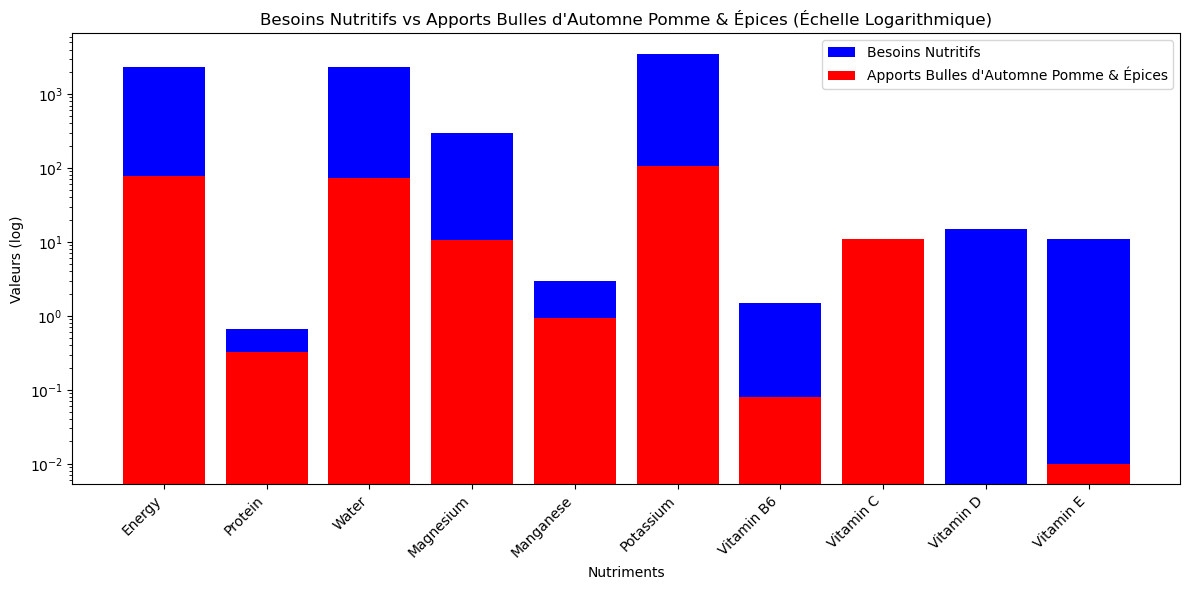

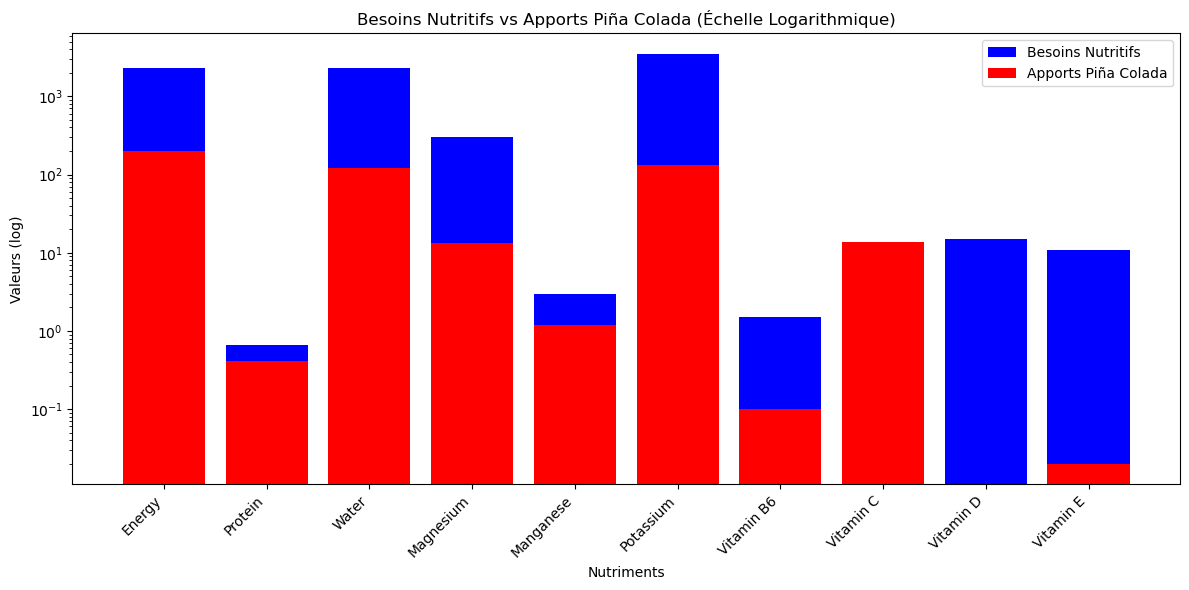

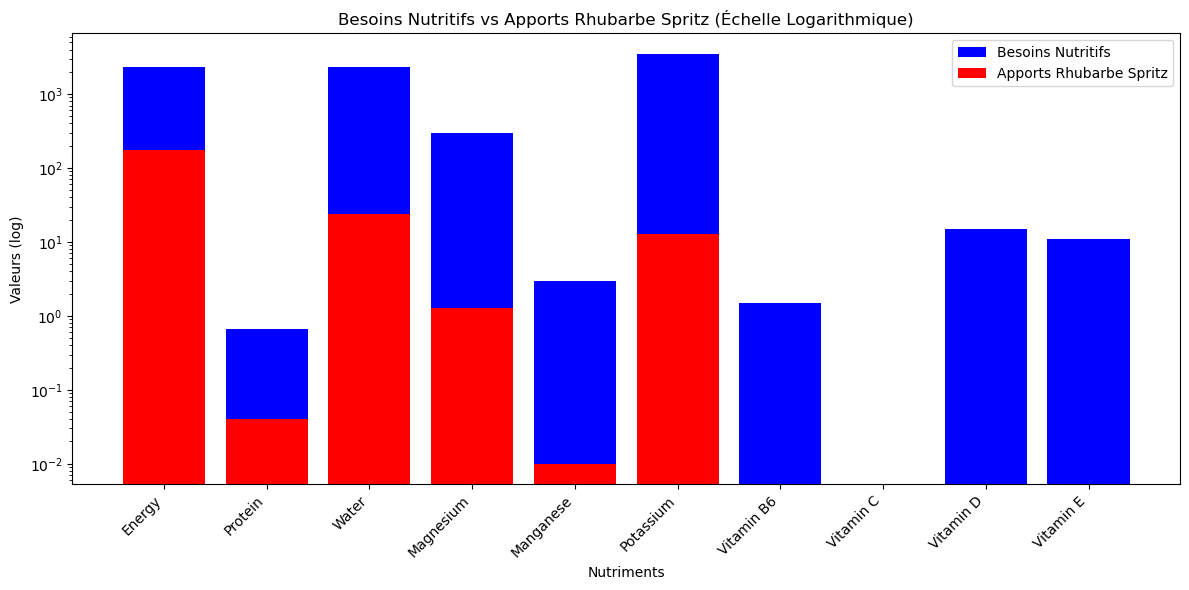

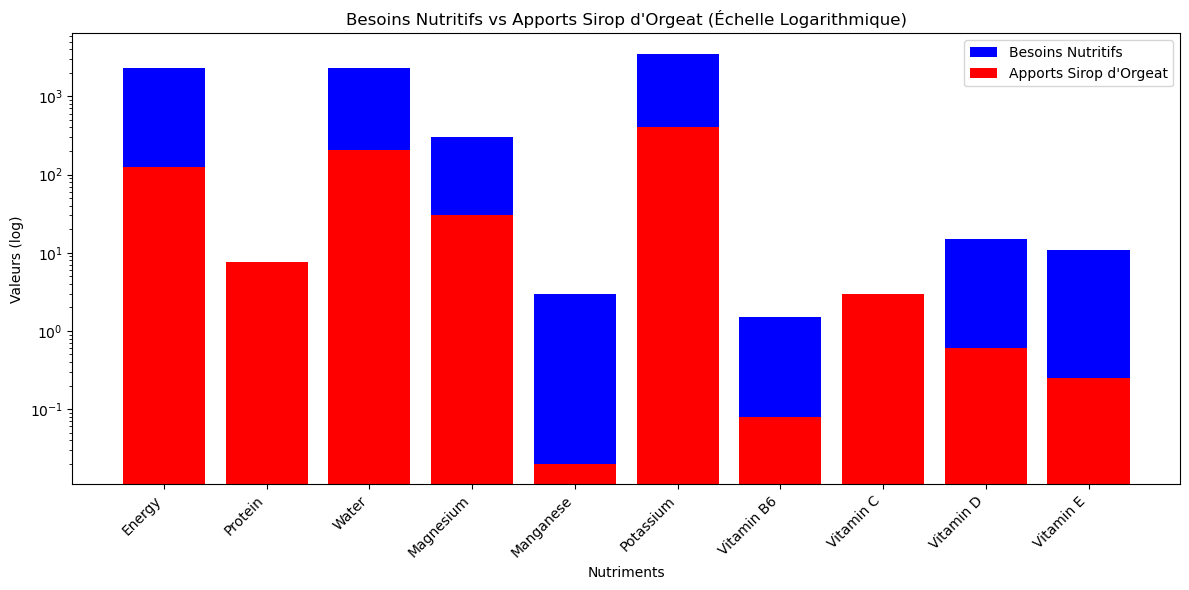

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Votre DataFrame initial avec les besoins nutritifs
df_inverse = pd.DataFrame(df_inverse)

# Votre DataFrame pour les apports de différents cocktails
cocktail_data = df_initial

df_initial = pd.DataFrame(cocktail_data)

# Créer un graphique pour chaque cocktail
for index, row in df_initial.iterrows():
    cocktail_name = row['post_title']
    
    # Créer un graphique à barres avec échelle logarithmique sur l'axe y
    plt.figure(figsize=(12, 6))
    
    # Besoins nutritifs existants (bleu)
    plt.bar(df_inverse['Nutrient'], df_inverse['Value'], color='blue', label='Besoins Nutritifs')
    
    # Apports du cocktail (rouge)
    plt.bar(df_inverse['Nutrient'], row[df_inverse['Nutrient']], color='red', label=f'Apports {cocktail_name}')
    
    plt.yscale('log')  # Ajouter une échelle logarithmique sur l'axe y
    
    plt.title(f'Besoins Nutritifs vs Apports {cocktail_name} (Échelle Logarithmique)')
    plt.xlabel('Nutriments')
    plt.ylabel('Valeurs (log)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    # Enregistrer le graphique au format PNG
    plt.tight_layout()
    plt.savefig(f'graphique_{cocktail_name}.png')
    
    # Afficher le graphique
    plt.show()
